In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%cd ../..

/home/nassim/dev/conrl


In [4]:
from src.mlgng import MultiLayerGrowingNeuralGas
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [5]:
n_samples = 2000
X1, y1 = datasets.make_moons(n_samples=n_samples, noise=.05)
X2, y2 = datasets.make_blobs(n_samples=n_samples, random_state=8)

#data = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

X1 = StandardScaler().fit_transform(X1)
X2 = StandardScaler().fit_transform(X2)
_, col = X1.shape

In [6]:
mlgng = MultiLayerGrowingNeuralGas(m=2, ndim=col)

for k in range(mlgng.m):
    for j in range(3):
        for i in range(n_samples):
            if k == 0:
                mlgng[k].fit(X1[i])
            else:
                mlgng[k].fit(X2[i])

In [13]:
import matplotlib.pyplot as plt
from graph_tool.draw import graph_draw
%matplotlib inline
plt.switch_backend("cairo")


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd569910b00, at 0x7fd569910dd8>

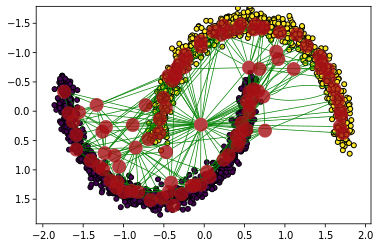

In [14]:
# Layer 1

fig, ax = plt.subplots()

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1, s=25, edgecolor='k', zorder=-2)
graph_draw(mlgng[0].g, pos=mlgng[0].g.vp.pos, output_size=(200, 200), edge_color="green", vertex_size=0.2, vertex_pen_width=0.001, edge_pen_width=0.01, mplfig=ax)

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd569910eb8, at 0x7fd5699260f0>

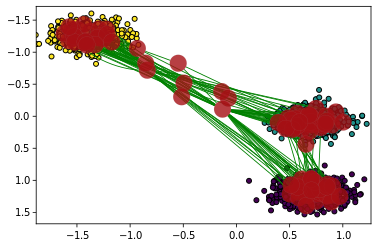

In [15]:
# Layer 2
fig, ax = plt.subplots()

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y2, s=25, edgecolor='k', zorder=-2)
graph_draw(mlgng.layers[1].g, pos=mlgng.layers[1].g.vp.pos, output_size=(200, 200), edge_color="green", vertex_size=0.2, vertex_pen_width=0.001, edge_pen_width=0.01, mplfig=ax)

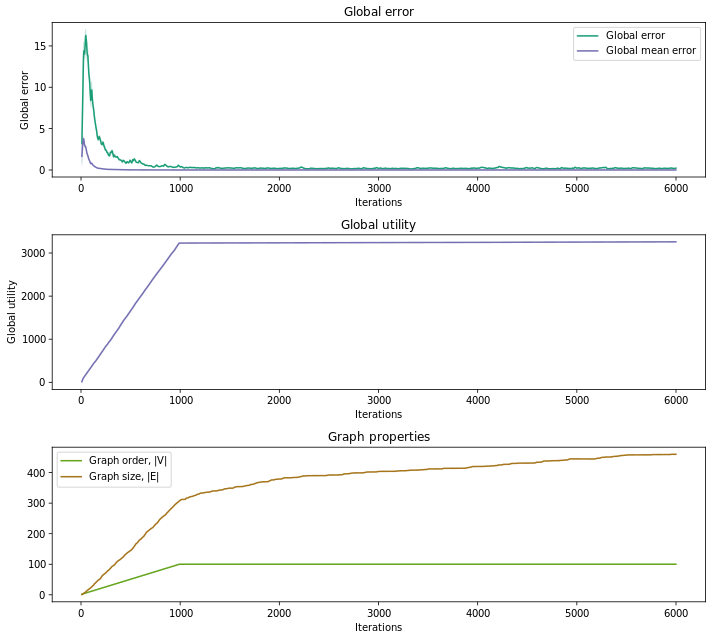

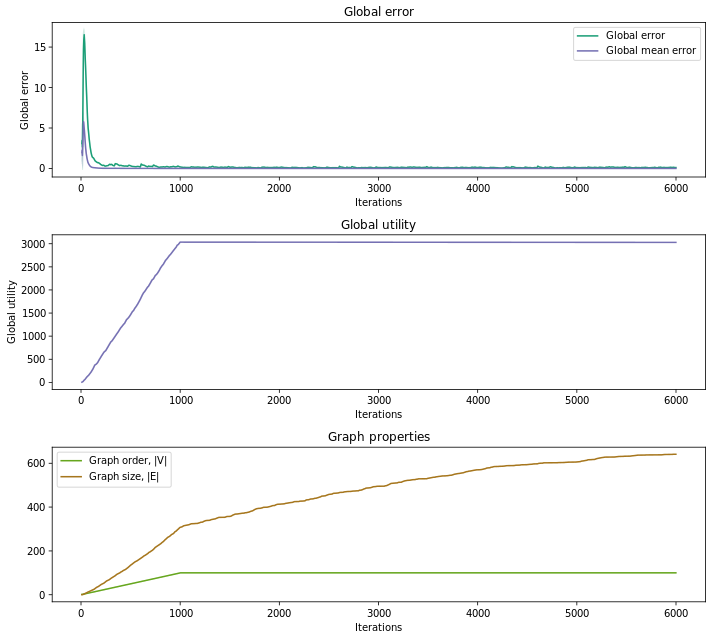

In [16]:
from src.utils import plot_gng_stats

plot_gng_stats(mlgng[0].stats, smoothed=True)
plot_gng_stats(mlgng[1].stats, smoothed=True)

In [17]:
mlgng1 = MultiLayerGrowingNeuralGas(m=2, ndim=col)

mlgng1.layers[0].fit(X1[0])
x = mlgng1.policy(X1[2])
mlgng1.layers[0].fit(X1[1])
y = mlgng1.policy(X1[2])
print(x)
print(y)

None
0


In [30]:
mlgng.get_last_stat_tuple("global_error")

{0: PropertyArray(0.222107), 1: PropertyArray(0.13798796)}